# 構築済みのモデルを使う



[{'test_condition': '出会うシーンの明るさ'}, {'cv2.cvtColor': [{'range': '0..99'}, {'stride': 1}]}, {'note': '真っ暗から日差しを想定した明度最大まで'}]
[{'test_condition': '出会うシーンの距離'}, {'cv2.resize': [{'range': '0.1..5.0'}, {'stride': 0.1}]}, {'note': '距離を想定した、1/10からx5まで'}]
[[9.9999380e-01 6.1961982e-06 1.1139456e-14]]
name: dog
score: 0.9999938


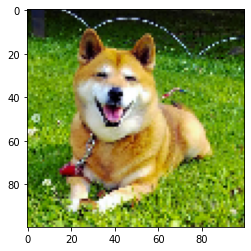

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
import cv2
import matplotlib.pyplot as plt
import json
 
colab_root = '/content/drive/MyDrive/colab_root/'
target_file_name = 'target.jpg'

json_open = open(colab_root + 'momotaro_metamorphic_testing_model.json', 'r', encoding="utf-8_sig")
data = json.load(json_open)

print(data[0]["abstract_test_case_1"])
print(data[1]["abstract_test_case_2"])



image_size = 100
# 画像ファイルの行列変換
img = img_to_array(load_img(colab_root + target_file_name, target_size=(image_size,image_size)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]
 
# modelの読み込み
model = load_model(colab_root + 'momotaro.h5')
# 正解ラベルの定義
label=['dog','monkey','pheasant']
 
# 判別
pred = model.predict(img_nad)
print(pred)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

plt.imshow(img_to_array(img)/255)



# 最終成果物：犬猿キジを見分けるモデル

最終的に出来上がる成果物。このモデルでは、犬と猿とキジを識別している。
桃太郎である。

Epoch 1/25
38/38 [==============================] - 6s 135ms/step - loss: 1.1299 - accuracy: 0.4168 - val_loss: 0.8604 - val_accuracy: 0.5721
Epoch 2/25
38/38 [==============================] - 4s 101ms/step - loss: 0.7135 - accuracy: 0.6516 - val_loss: 0.5617 - val_accuracy: 0.7562
Epoch 3/25
38/38 [==============================] - 4s 101ms/step - loss: 0.4605 - accuracy: 0.8013 - val_loss: 0.3929 - val_accuracy: 0.8557
Epoch 4/25
38/38 [==============================] - 4s 102ms/step - loss: 0.3522 - accuracy: 0.8582 - val_loss: 0.2818 - val_accuracy: 0.9055
Epoch 5/25
38/38 [==============================] - 4s 101ms/step - loss: 0.2518 - accuracy: 0.9038 - val_loss: 0.4706 - val_accuracy: 0.7977
Epoch 6/25
38/38 [==============================] - 4s 103ms/step - loss: 0.2143 - accuracy: 0.9183 - val_loss: 0.2740 - val_accuracy: 0.8939
Epoch 7/25
38/38 [==============================] - 4s 101ms/step - loss: 0.1223 - accuracy: 0.9589 - val_loss: 0.1796 - val_accuracy: 0.9303
Epoch 

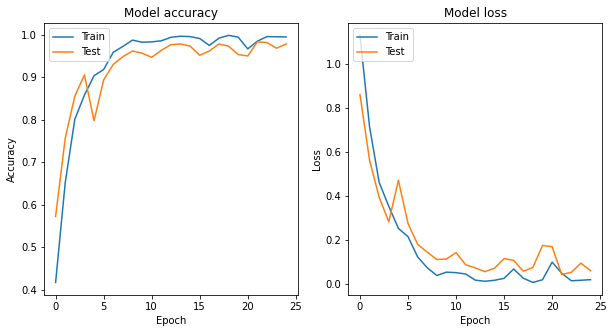

19/19 [==============================] - 0s 24ms/step - loss: 0.0593 - accuracy: 0.9784
[0.05928827077150345, 0.9784411191940308]
Test:
19/19 [==============================] - 0s 20ms/step - loss: 0.0593 - accuracy: 0.9784

Test accuracy: 0.9784411191940308


In [ ]:
import numpy as np
import glob
import keras.optimizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split
from PIL import Image
 
folder = ["dog_100","monkey_100","pheasant_100"]
image_size = 100
X = []
Y = []
colab_root = '/content/drive/MyDrive/colab_root/'
 
# Conv2D層に渡すために画像を加工する
for index, name in enumerate(folder):
    dir = colab_root + name
    files = glob.glob(dir + '/*.jpg')
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        X.append(data)
        Y.append(index)
 
X = np.array(X)
Y = np.array(Y)
 
X = X.astype('float32')
X = X / 255.0
 
# 正解ラベルの形式を変換
Y = np_utils.to_categorical(Y, 3)
 
# 学習用データとテストデータを切り分ける
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
'''
X_train:訓練用入力データ
X_test :訓練用正解データ
Y_train:評価用入力データ
Y_test :評価用正解データ
'''
 
# CNNを構築
# Sequentialモデルは addされたモデル層が一列に並ぶ
model = Sequential()
 
# Conv2D:2次元畳み込み層 2x2のパネルを32枚使う。padding='same' で出力画像のサイズが変わらないようにする
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
 
# モデルのコンパイル
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
 
# モデルの訓練
epochs_num=25
result = model.fit(X_train, Y_train, batch_size=64, epochs=epochs_num, validation_data=(X_test, Y_test))
 
# モデルの保存 
model.save(colab_root + 'momotaro.h5')
 
# 学習過程の表示
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10,5)) # グラフのサイズ
 
# Plot training & validation accuracy values
plt.subplot(1,2,1) # 1つめのグラフ
 
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
 
# Plot training & validation loss values
plt.subplot(1,2,2) # 2つめのグラフ
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
    
plt.show() # グラフを表示する
 
# 評価 & 評価結果出力
print(model.evaluate(X_test, Y_test))
print('Test:')
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print('\nTest accuracy:', test_acc)

# OpenCVの変換確認 明度変換

resize
1
20
1
0.1


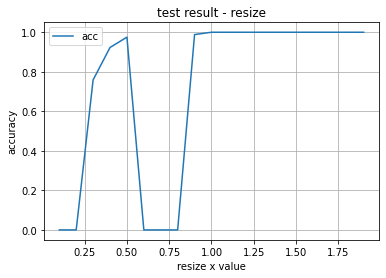

In [1]:
import cv2
import numpy as np
import json
from google.colab.patches import cv2_imshow
from keras.models import load_model

colab_root = '/content/drive/MyDrive/colab_root/'
metamorphic_images_store = '/content/drive/MyDrive/colab_root/metamorphic_images/'
src_image_filname = 'target.jpg'

# modelの読み込みと正解ラベルの定義
model = load_model(colab_root + 'momotaro.h5')

label=['dog', 'monkey', 'pheasant']
x=[]
y=[]
coefficient = 0

# テストケースクラスの読み込み
json_open = open(colab_root + 'momotaro_metamorphic_testing_model.json', 'r', encoding="utf-8_sig")
test_case_class = json.load(json_open)

#brightness
#tc1 = test_case_class[0]["abstract_test_case_1"][2][0]["metamorphic_range"]
#test_condition_label = test_case_class[0]["abstract_test_case_1"][1]["test_condition_label"]

#resize
tc1 = test_case_class[1]["abstract_test_case_2"][2][0]["metamorphic_range"]
test_condition_label = test_case_class[1]["abstract_test_case_2"][1]["test_condition_label"]


print(test_condition_label)
print(tc1[0]["start"])
print(tc1[1]["end"])
print(tc1[2]["stride"])

# テストケースクラスの指定に従って画像変換
def gen_metamorphic_images(test_condition_label, start, end, stride):
  global coefficient
  if test_condition_label == 'brightness': #明度を変更した画像を生成する
    coefficient = 0.01
    for i in range(start, end, stride):
      img = cv2.imread(colab_root + src_image_filname,1)
      img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
      rows,cols = img.shape[:-1]
      img_hsv[:,:,(2)] = img_hsv[:,:,(2)]*(i*coefficient)  # 明度の計算
      dst = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)  # 色空間をHSVからBGRに変換
      cv2.imwrite(metamorphic_images_store + test_condition_label + str(i) + '_'+ src_image_filname, dst)

  elif test_condition_label == 'resize': #拡縮を変更した画像を生成する
    coefficient = 0.1
    for i in range(start, end, stride):
      img = cv2.imread(colab_root + src_image_filname,1)
      h, w = img.shape[:2]
      src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
      dest = src * i * coefficient
      affine = cv2.getAffineTransform(src, dest)
      converted = cv2.warpAffine(img, affine, (1*w, 1*h), cv2.INTER_LANCZOS4) 
      cv2.imwrite(metamorphic_images_store + test_condition_label + str(i) + '_'+ src_image_filname, converted)

  elif test_condition_label == 'warpAffine': #横ズレ画像を生成する
    for i in range(start, end, stride):
      img = cv2.imread(colab_root + src_image_filname,1)
      img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
      rows,cols = img.shape[:-1]
      img_hsv[:,:,(2)] = img_hsv[:,:,(2)]*(i*0.01)  # 明度の計算
      dst = cv2.cvtColor(img_hsv,cv2.COLOR_HSV2BGR)  # 色空間をHSVからBGRに変換
      cv2.imwrite(metamorphic_images_store + test_condition_label + str(i) + '_'+ src_image_filname, dst)

gen_metamorphic_images(test_condition_label,tc1[0]["start"], tc1[1]["end"], tc1[2]["stride"])

# 画像の読み込みと変換と判定
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, load_img

print(coefficient)

for i in range(tc1[0]["start"], tc1[1]["end"]):
  # 画像を読み込んでテンソル形式に変換
  img = image.load_img(metamorphic_images_store + test_condition_label + str(i) + '_'+ src_image_filname, target_size=(100,100))
  img_nad = img_to_array(img)/255
  img_nad = img_nad[None, ...]

  # 判別
  pred = model.predict(img_nad, batch_size=1, verbose=0)
  score = np.max(pred)
  pred_label = label[np.argmax(pred[0])]
  #print('src:R',str(i*10),'name:',pred_label,'score:',score)
  if pred_label != 'dog': #誤判定の場合はスコアを0に TODO:誤判定が犬即値はいただけない
    score = 0
  x.append(i*coefficient)
  y.append(score)

import matplotlib.pyplot as plt

plt.plot(x,y,label="acc")
plt.title('test result - ' + test_condition_label)
plt.xlabel(test_condition_label + ' x value')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()
plt.show()



# OpenCVの変換確認 拡大縮小

In [ ]:
import cv2
import numpy as np
import json
from google.colab.patches import cv2_imshow
from keras.models import load_model

colab_root = '/content/drive/MyDrive/colab_root/'
metamorphic_images_store = '/content/drive/MyDrive/colab_root/metamorphic_images/'
src_image_filname = 'target.jpg'

# テストケースクラスの読み込み
json_open = open(colab_root + 'momotaro_metamorphic_testing_model.json', 'r', encoding="utf-8_sig")
test_case_class = json.load(json_open)
tc1 = test_case_class[1]["abstract_test_case_2"][2][0]["metamorphic_range"]
test_condition_label = test_case_class[1]["abstract_test_case_2"][1]["test_condition_label"]
print(tc1, test_condition_label)

# テストケースクラスの指定に従ってサイズを変更した画像を生成する
def gen_metamorphic_images_brightness(start, end, stride):
  for i in range(start, end, stride):

    img = cv2.imread(colab_root + src_image_filname,1)

    cv2.imwrite(metamorphic_images_store + test_condition_label + str(i*0.01) + '_'+ src_image_filname, dst_img)


[{'start': 1}, {'end': 50}, {'stride': 1}] resize


# OpenCV Sandbox

# ネットから取得したデータで判定

https://upload.wikimedia.org/wikipedia/commons/6/60/Phasianus_versicolor_in_field.JPG
[[5.4615655e-04 1.0763202e-02 9.8869061e-01]]
name: pheasant
score: 0.9886906


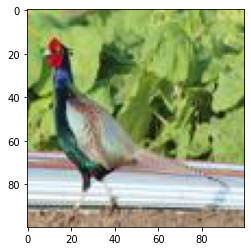

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from PIL import Image

image_size = 100 
target_file_name = 'target.jpg'
colab_root = '/content/drive/MyDrive/colab_root/'

url = input()
r = requests.get(url)
i = Image.open(BytesIO(r.content))
i = i.resize(size=(image_size, image_size))
i.save(target_file_name)

# 画像ファイルの行列変換
img = img_to_array(load_img(target_file_name, target_size=(image_size,image_size)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]
 
# modelの読み込み
model = load_model(colab_root + 'momotaro.h5')
# 正解ラベルの定義
label=['dog','monkey','pheasant']
 
# 判別
pred = model.predict(img_nad)
print(pred)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

plt.imshow(img_to_array(img)/255)


In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import img_to_array, load_img
from IPython.display import display

colab_root = '/content/drive/MyDrive/colab_root/'

# modelと画像ファイルの読み込み
model = load_model(colab_root + 'ramen_hiyashi_acc0.9675.h5')

# 画像ファイルの行列変換
img = img_to_array(load_img(colab_root + 'ramen_2.jpg', target_size=(100,100)))
display(img)
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]
display(img_nad)

# colab sandbox

In [ ]:
import requests

colab_root = '/content/drive/MyDrive/colab_root/'

url = input()

r = requests.get(url)
if r.status_code == 200:
    with open(colab_root + 'target.jpg', 'wb') as f:
        f.write(r.content)

https://tk.ismcdn.jp/mwimgs/e/b/1140/img_eb31afc9c1fb914d68a7c73b657c7ebe183087.jpg


In [ ]:
print("hello")

hello


In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
import matplotlib.pyplot as plt
from io import BytesIO
import requests
from PIL import Image

image_size = 100 
target_file_name = 'target.jpg'
colab_root = '/content/drive/MyDrive/colab_root/'

url = input()
r = requests.get(url)
i = Image.open(BytesIO(r.content))
i = i.resize(size=(image_size, image_size))
i.save(target_file_name)

# 画像ファイルの行列変換
img = img_to_array(load_img(target_file_name, target_size=(image_size,image_size)))
img_nad = img_to_array(img)/255
img_nad = img_nad[None, ...]
 
# modelの読み込み
model = load_model(colab_root + 'momotaro.h5')
# 正解ラベルの定義
label=['dog','monkey','pheasant']
 
# 判別
pred = model.predict(img_nad)
print(pred)
score = np.max(pred)
pred_label = label[np.argmax(pred[0])]
print('name:',pred_label)
print('score:',score)

plt.imshow(img_to_array(img)/255)
